# Pause test
This file contains the code that attempts to remove silent periods from the audio files

In [1]:
#import required libraries
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

/Users/thijsclowting/miniconda3/envs/py-audio/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import librosa

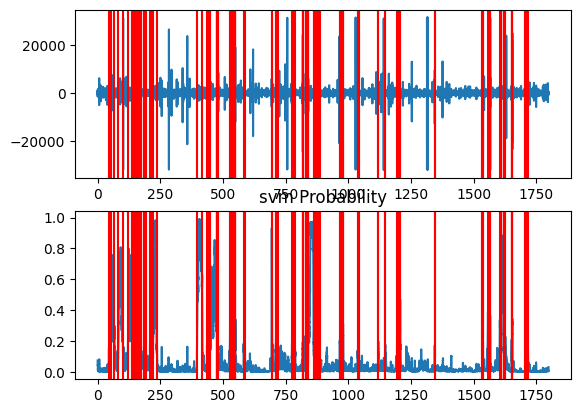

In [2]:
# path to audio file
path = 'data/recordings/20230102_000001.WAV'
# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

In [5]:
def update_segments(filename, segments, sil_time):
    '''
    filename= audio file path
    segments= Active segment output from pyaudoanalysis
    sil_time = Silence time/ Time threshold above which silence to be considered
    returns:
    list of start and end of silent time frames
    '''
    ans = []
    tmp = 0
    n = len(segments)
    for idx, t in enumerate(segments):
        if t[0] - tmp >= sil_time:
            ans.append((tmp, t[0]))
        tmp=t[1]
        if idx == n-1:
            fn = librosa.get_duration(filename = filename)
            if fn - tmp >= sil_time:
                ans.append((tmp, fn))
    return ans

In [6]:
silent_segments = update_segments(path, segments, 10)

TypeError: 'numpy._DTypeMeta' object is not subscriptable